In [71]:
from skimage import io
from skimage.color import rgb2gray
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.transform import resize

import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
face = io.imread('face.jpg')
grey_face = rgb2gray(face)

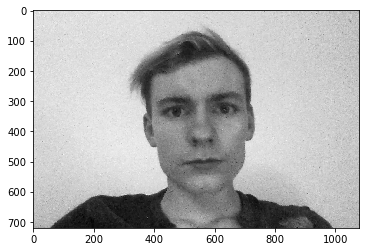

In [4]:
plt.imshow(grey_face, cmap="gray")
plt.show()

## Try Edge Detection

In [5]:
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(grey_face)
edge_sobel = sobel(grey_face)
edge_roberts = roberts(grey_face)
edge_scharr = scharr(grey_face)
edge_prewitt = prewitt(grey_face)

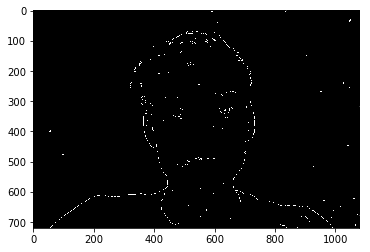

In [6]:
plt.imshow(edges1, cmap="gray")
plt.show()

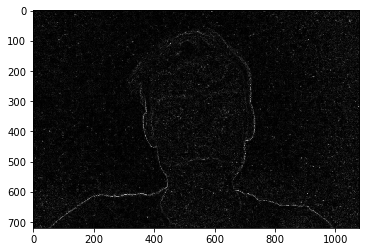

In [7]:
plt.imshow(edge_roberts, cmap="gray")
plt.show()

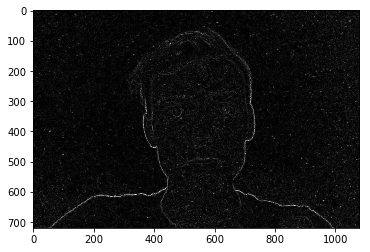

In [8]:
plt.imshow(edge_scharr, cmap="gray")
plt.show()

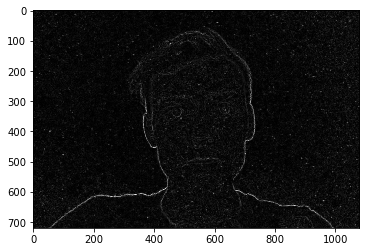

In [9]:
plt.imshow(edge_prewitt, cmap="gray")
plt.show()

## Try Downsizing and thresholding

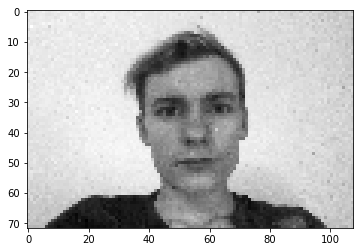

In [61]:
y = grey_face.shape[0]
x = grey_face.shape[1]

new_y = y / 10
new_x = x / 10

small_grey_face = resize(grey_face, [new_y, new_x])

plt.imshow(small_grey_face, cmap="gray")
plt.show()

In [62]:
colour_bins = 10
small_grey_face_v2 = small_grey_face
for i in range(0, small_grey_face_v2.shape[0]):
    for j in range(0, small_grey_face_v2.shape[1]):
        small_grey_face_v2[i,j] = round(small_grey_face_v2[i,j],1)

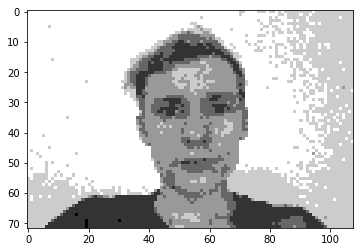

In [63]:
plt.imshow(small_grey_face_v2, cmap="gray")
plt.show()

In [69]:
small_grey_face_v2.shape

(72, 108)

In [73]:
image_df = pd.DataFrame(data=small_grey_face_v2)

In [74]:
image_df.to_csv('face_grey.csv')

# Try HOG

In [57]:
hog_vec, hog_vis = feature.hog(grey_face, visualise=True)

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(grey_face, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

